In [83]:
!pip install tensorflow gpu


ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu


**Some required Libraries**

In [86]:
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np 
from glob import glob

All the images are to be resize 

In [89]:
#re-sizing images 
image_size = [384,384]

# the path for train and test path
train_image_path = 'Daataset/train'
test_image_path = 'Daataset/test'



Now importing vgg19 and addinig preproccesing layer to vgg19

In [90]:
#weight will be using of imagenet 
# include_top will be False for freezing the last layer 

inception_v3 = InceptionV3(input_shape = image_size + [3] , weights= 'imagenet' , include_top= False)

In [91]:
# Here  i am freexing the model 
for layer in inception_v3.layers:
  layer.trainable = False

In [92]:
#getting number of outputs 
folders = glob('Daataset/train/*')

In [93]:
folders

['/content/drive/MyDrive/Daataset.zip (Unzipped Files)/Daataset/train/maligns',
 '/content/drive/MyDrive/Daataset.zip (Unzipped Files)/Daataset/train/benigns']

In [94]:
# Flatten the output of vgg19 
x=Flatten()(inception_v3.output)

In [95]:
prediction = Dense(len(folders ) , activation='softmax')(x)

In [96]:
# creating the model 

model = Model(inputs= inception_v3.input , outputs = prediction)

In [97]:
#Showng model structure 
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 384, 384, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 191, 191, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 191, 191, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 191, 191, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [98]:
# The optization and cost method should be assign as follow

model.compile(
    loss = 'categorical_crossentropy' ,
    optimizer = 'adam' ,
    metrics = ['accuracy']
)

In [99]:
# here i am using imageData generator to import the images 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Train Data 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
    
)


# Test Data 

test_datagen = ImageDataGenerator(rescale= 1./255)

In [100]:
training_set = train_datagen.flow_from_directory('Daataset/train',
                                                 target_size = (384, 384),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 462 images belonging to 2 classes.


In [101]:
test_set = test_datagen.flow_from_directory('Daataset/test',
                                            target_size = (384, 384),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 90 images belonging to 2 classes.


In [103]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
15/15 [==============================] - 15s 1s/step - loss: 1.1208 - accuracy: 0.8268 - val_loss: 4.5364 - val_accuracy: 0.5333
Epoch 2/20
15/15 [==============================] - 15s 1s/step - loss: 1.5255 - accuracy: 0.7835 - val_loss: 4.2054 - val_accuracy: 0.5889
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 1.2366 - accuracy: 0.8463 - val_loss: 4.3705 - val_accuracy: 0.6111
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 1.1391 - accuracy: 0.8463 - val_loss: 4.4595 - val_accuracy: 0.6000
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.9163 - accuracy: 0.8615 - val_loss: 6.3848 - val_accuracy: 0.4778
Epoch 6/20
15/15 [==============================] - 15s 1s/step - loss: 1.1995 - accuracy: 0.8593 - val_loss: 4.3659 - val_accuracy: 0.5778
Epoch 7/20
15/15 [==============================] - 15s 1s/step - loss: 0.8545 - accuracy: 0.8766 - val_loss: 4.6250 - val_accuracy: 0.5333
Epoch 8/20
15/15 [==

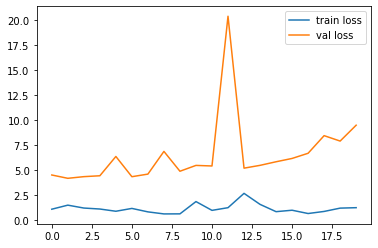

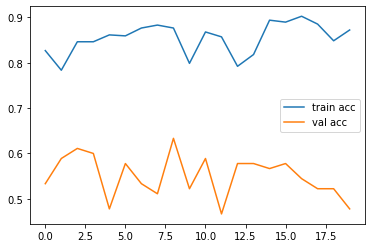

<Figure size 432x288 with 0 Axes>

In [106]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [108]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('thyroid.h5')

In [109]:
y_pred = model.predict(test_set)

In [110]:
y_pred

array([[7.45512929e-10, 1.00000000e+00],
       [3.26544114e-06, 9.99996781e-01],
       [1.29844644e-03, 9.98701572e-01],
       [1.00000000e+00, 5.58209728e-11],
       [7.87180603e-01, 2.12819397e-01],
       [2.81263910e-05, 9.99971867e-01],
       [4.97044713e-19, 1.00000000e+00],
       [1.43206663e-07, 9.99999881e-01],
       [4.60464984e-20, 1.00000000e+00],
       [7.21369064e-19, 1.00000000e+00],
       [9.99372184e-01, 6.27810310e-04],
       [9.98694956e-01, 1.30508887e-03],
       [2.10552727e-07, 9.99999762e-01],
       [2.47641668e-01, 7.52358317e-01],
       [1.39137194e-03, 9.98608649e-01],
       [3.22077015e-15, 1.00000000e+00],
       [1.00092338e-05, 9.99989986e-01],
       [1.84250296e-17, 1.00000000e+00],
       [3.95750270e-17, 1.00000000e+00],
       [6.27472699e-02, 9.37252760e-01],
       [3.22441102e-10, 1.00000000e+00],
       [5.07560108e-05, 9.99949217e-01],
       [9.99950886e-01, 4.91088140e-05],
       [2.59694854e-13, 1.00000000e+00],
       [1.615622